In [1]:
import sys
sys.path.append("..")
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
plt.ion()
%matplotlib inline
from cavsim2d.cavity import Cavity, Cavities, OperationPoints, Pillbox, RFGun, Dakota
from ngsolve import *
from ngsolve.webgui import Draw
from netgen.occ import *
import pprint
import pandas as pd
import os

pp = pprint.PrettyPrinter(indent=4)

DONE:: Project D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest created successfully/already exists.


<Axes: xlabel='$z$ [m]', ylabel='$r$ [m]'>

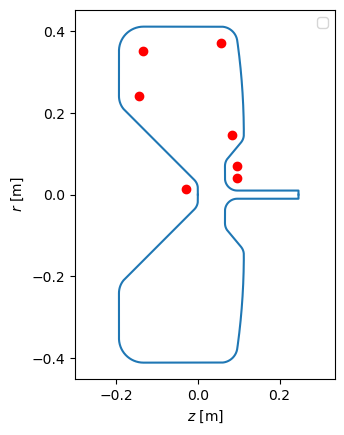

In [2]:

cavs = Cavities()
cavs.save(project_folder='D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest')
# createrf gun cavity
shape = {
    'geometry': {
        'y1': 1.5*1e-2 , 'R2': 3*1e-2, 'T2': np.deg2rad(45), 'L3': 24*1e-2, 
        'R4': 5*1e-2, 'L5': 11*1e-2, 'R6': 6*1e-2, 'L7': 19*1e-2, 'R8': 4*1e-2, 
        'T9': np.deg2rad(8), 'R10': 3*1e-2, 'T10': np.deg2rad(40), 
        'L11': 5*1e-2, 'R12': 3*1e-2, 'L13': 3*1e-2, 'R14': 3*1e-2, 'x': 1*1e-2
        }
    }
gun = RFGun(shape)

cavs.add_cavity(gun, 'gun', 'gun')
cavs.plot('geometry')


In [3]:
cavs.run_eigenmode()

it is here


In [4]:
cavs.eigenmode_qois

{'gun': {'Normalization Length [mm]': 0.06,
  'freq [MHz]': 213.0917769455116,
  'Q []': 42704.93550056227,
  'Vacc [MV]': 2.2176378540478667e-06,
  'Eacc [MV/m]': 0.036960630900797785,
  'Epk [MV/m]': 0.00034661182587159857,
  'Hpk [A/m]': 0.02617332940935228,
  'Bpk [mT]': 3.289037575696272e-05,
  'Rsh [MOhm]': 5.639155097126977,
  'R/Q [Ohm]': 132.04925920219995,
  'Epk/Eacc []': 0.009377865513224155,
  'Bpk/Eacc [mT/MV/m]': 0.000889875928937479,
  'G [Ohm]': 160.44203219669697,
  'GR/Q [Ohm^2]': 21186.251496469347}}

In [5]:
# gun.plot_fields()

In [6]:
# gun.plot_axis_field()

In [7]:
# cavs.plot_axis_fields()

In [8]:
# gun.Ez_0_abs

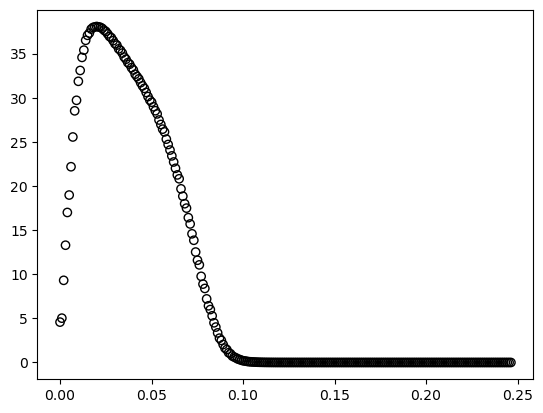

In [11]:
import matplotlib.pyplot as plt

plt.scatter(gun.Ez_0_abs['z(0, 0)'], gun.Ez_0_abs['|Ez(0, 0)|'], fc='none', ec='k')